In [5]:
from network_model import *


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [3]:
def isoelastic(x, eta=0.5):
    return x**(1-eta) / (1-eta)

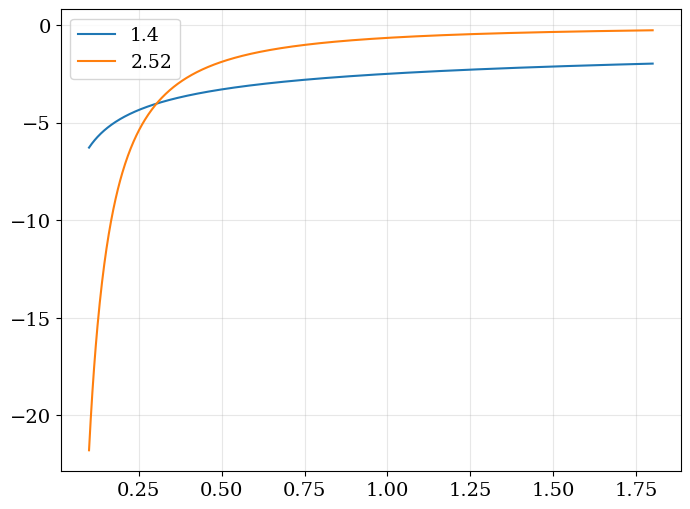

In [6]:
x_vals = np.linspace(0.1, 1.8, 1000)


for eta in [1.4, 1.4*1.8]:
    plt.plot(x_vals, isoelastic(x_vals, eta), label=eta)
plt.legend()
plt.show()

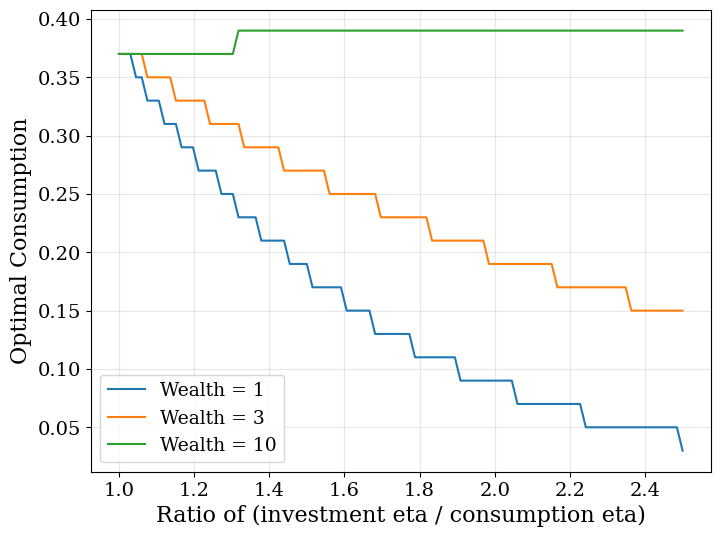

In [291]:
eta = 1.4

investment_returns = np.array([1.8, 1.1, 1.1])-1


for w in [1, 3, 10]:


    optimal_c = []

    scale_vals = np.linspace(1.0, 2.5, 100)
    for scale in scale_vals:
        utils = []
        c_vals = np.linspace(0.01,0.99)
        for c in c_vals:
            utils.append( - (isoelastic(w*c, eta) + isoelastic(w*(1-c)*sum(investment_returns*alloc), eta*scale)))
        optimal_c.append(c_vals[np.argmin(utils)])

    plt.plot(scale_vals, optimal_c, label=f"Wealth = {w}")

plt.legend()
plt.xlabel("Ratio of (investment eta / consumption eta)")
plt.ylabel("Optimal Consumption")

plt.show()

In [245]:
w = 10
c_vals = np.linspace(0.01,0.99)

eta = 1.5

scale = 1.1

u_c = []
u_i = []
for c in c_vals:
    u_c.append(isoelastic(w*c, eta))
    u_i.append(isoelastic(sum(w*(1-c)*investment_returns), eta*scale))

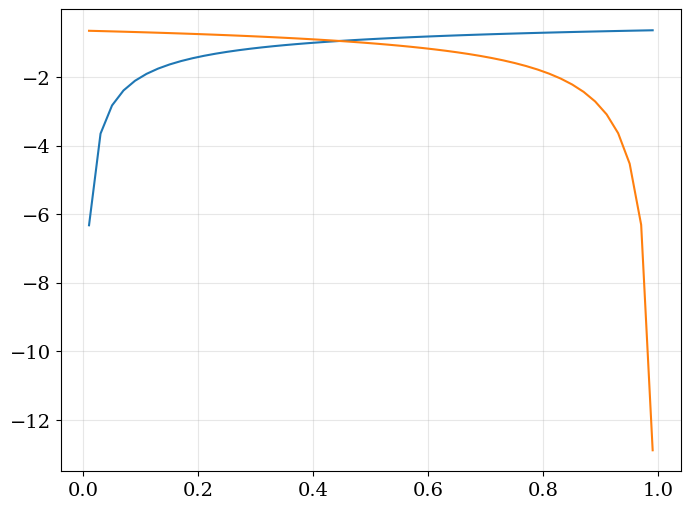

In [246]:
plt.plot(c_vals, u_c)
plt.plot(c_vals, u_i)

plt.show()

In [29]:
investment_returns = np.array([1.17, 1.08, 1.1])
alloc = np.array([0.5, 0.2, 0.3])

R = sum(investment_returns * alloc)
print(R)

1.131


In [34]:
W = 1.0
eta = 1.4

utils = []
c_vals = np.linspace(0.05, 0.95, 1000)
for c in c_vals:
    utility = isoelastic ( W*c + (1-c)*W*R , eta )
    utils.append(utility)

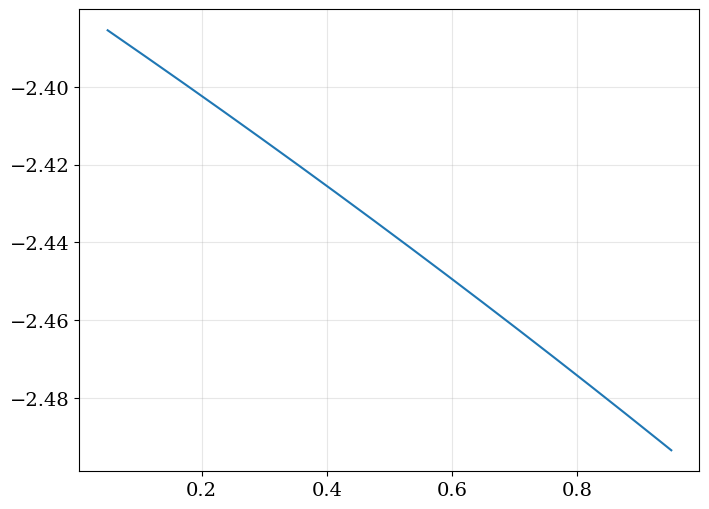

In [35]:
plt.plot(c_vals, utils)